Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round', 'Metacritic_norm_round', 'Metacritic_user_norm_round', 'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes', 'Fandango_Difference'], dtype='object')
(146, 22)


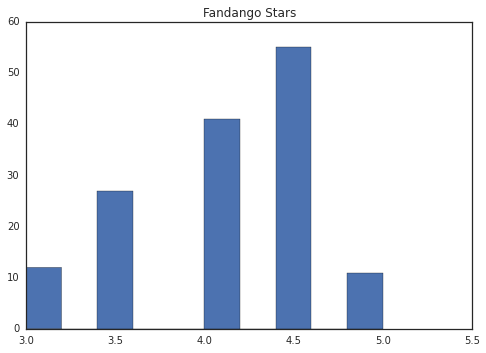

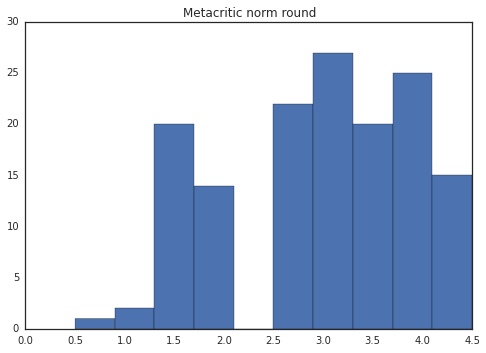

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

movies = pd.read_csv('fandango_score_comparison.csv')
dimensions = movies.shape
cols = movies.columns
print(cols)
print(dimensions)
plt.hist(movies['Fandango_Stars'])
plt.title('Fandango Stars')
plt.show()
plt.hist(movies['Metacritic_norm_round'])
plt.title('Metacritic norm round')
plt.show()

### Fandango Vs Metacrilic
The Fandango ratings tend to be around 4 and 4.5 and the Metacritic ratings tend to me between 3 and 4. On average, Metacrilic tend to score less than Fandango.

In [2]:
fan_mean = movies['Fandango_Stars'].mean()
met_mean = movies['Metacritic_norm_round'].mean()
fan_median = movies['Fandango_Stars'].median()
met_median = movies['Metacritic_norm_round'].median()
fan_std = movies['Fandango_Stars'].std()
met_std = movies['Metacritic_norm_round'].std()

print(fan_mean);print(fan_median);print(fan_std)
print(met_mean);print(met_median);print(met_std)

4.08904109589
4.0
0.540385977979
2.97260273973
3.0
0.990960561374


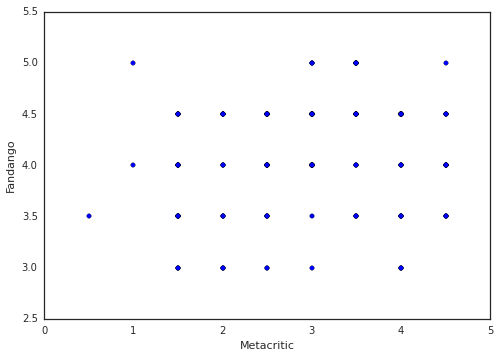

In [3]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.xlabel('Metacritic')
plt.ylabel('Fandango')
plt.show()

In [4]:
movies['fm_diff'] = np.absolute(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])
movies.sort('fm_diff', ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3


In [5]:
from scipy.stats import pearsonr, linregress


In [6]:
r_value, p_value = pearsonr(movies['Metacritic_norm_round'], movies['Fandango_Stars'])


### Fandango and Metacritic Correlation
The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.

In [7]:
slope, intercept, r_value, p_value, stderror = linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])

def predict_score(x_value):
    return slope * x_value + intercept
predict_score(3.0)

4.0917071528212041

In [8]:
predict_score(4.0)

4.1890182307951322

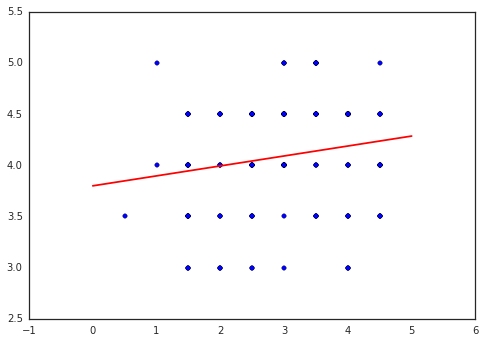

In [10]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
x = [i for i in range(0,6)]
y = [predict_score(i) for i in x]
plt.plot(x,y,color='red')
plt.show()